## EDA - Credit Card Fraud Detection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = "whitegrid")

df = pd.read_csv("../data/creditcard.csv")

In [3]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Target Distribution

In [4]:
df['Class'].value_counts()
df['Class'].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

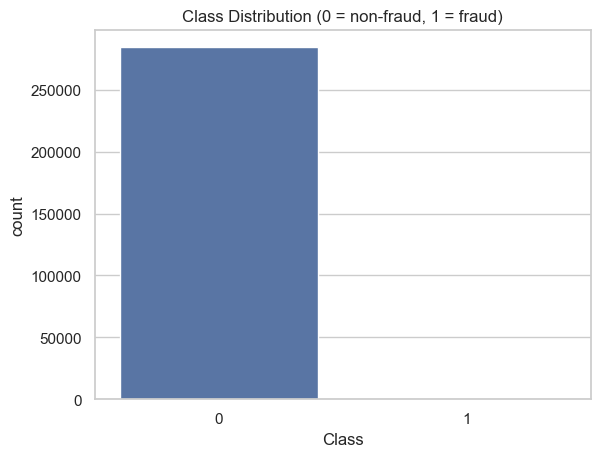

In [5]:
sns.countplot(data=df, x='Class')
plt.title("Class Distribution (0 = non-fraud, 1 = fraud)")
plt.show()

### Class distribution

- Non-fraud transactions (Class = 0): 284,315.
- Fraudulent transactions (Class = 1): 492.
- Percentage of fraud: about 0.17% of all transactions.
- This imbalance is important because a model could predict every transaction as non-fraud and still get ~99.8% accuracy, while completely missing almost all real fraud cases.

### Distributions of key numeric features

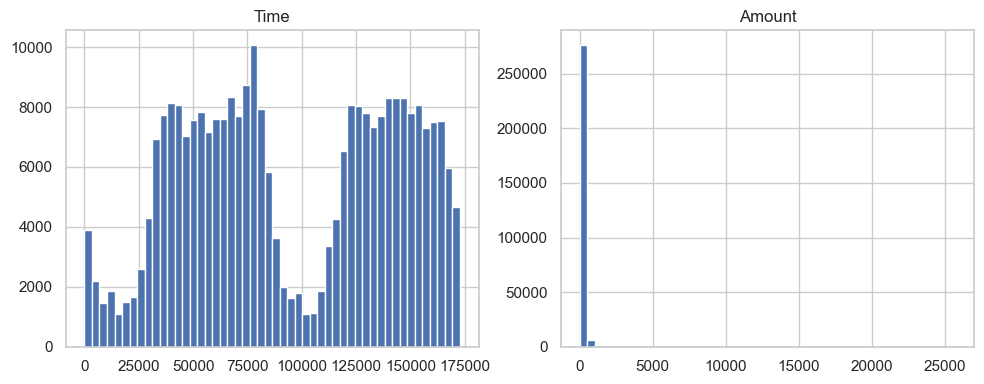

In [6]:
numeric_cols = ['Time', 'Amount']  # you can add more later
df[numeric_cols].hist(bins=50, figsize=(10, 4))
plt.tight_layout()
plt.show()

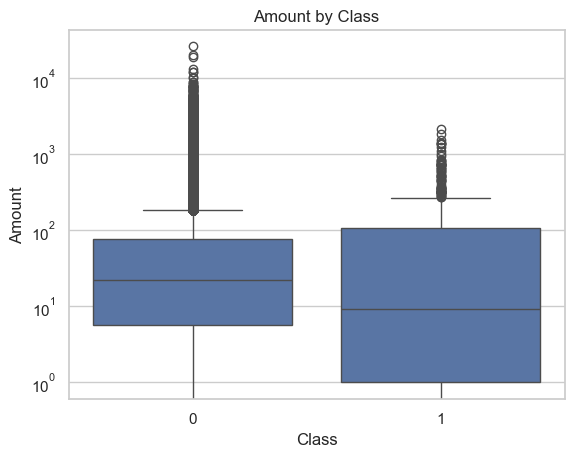

In [7]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Amount by Class")
plt.yscale('log')  # optional, to see distribution better
plt.show()

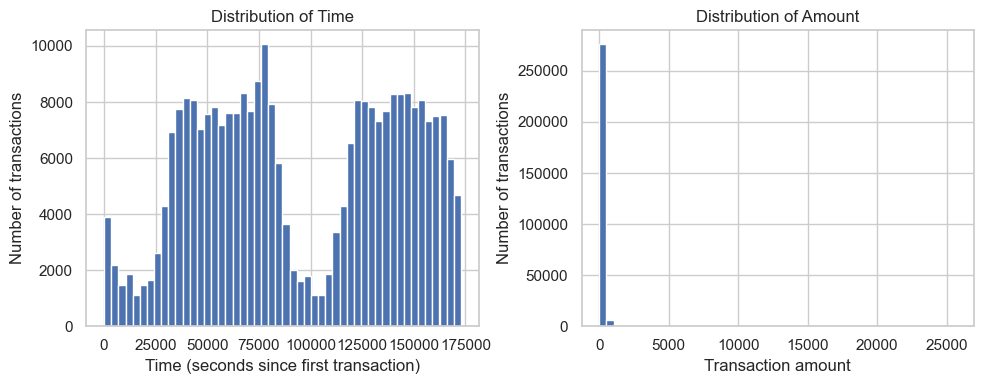

In [8]:
numeric_cols = ['Time', 'Amount']
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Time
axes[0].hist(df['Time'], bins=50)
axes[0].set_title("Distribution of Time")
axes[0].set_xlabel("Time (seconds since first transaction)")
axes[0].set_ylabel("Number of transactions")
# Amount
axes[1].hist(df['Amount'], bins=50)
axes[1].set_title("Distribution of Amount")
axes[1].set_xlabel("Transaction amount")
axes[1].set_ylabel("Number of transactions")

plt.tight_layout()
plt.show()
plt.show()

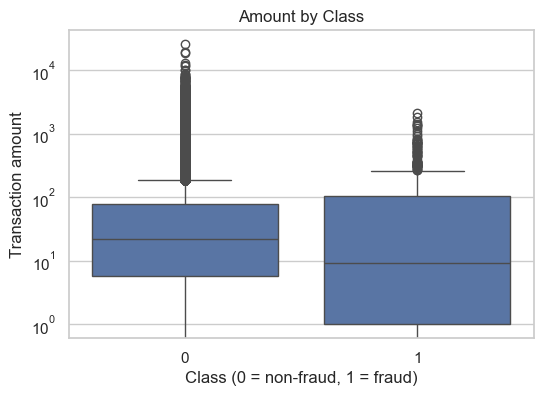

In [9]:
# 2) Boxplot: Amount by Class
plt.figure(figsize=(6, 4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Amount by Class")
plt.xlabel("Class (0 = non-fraud, 1 = fraud)")
plt.ylabel("Transaction amount")
plt.yscale('log')  # makes it easier to see the spread
plt.show()

### Distributions of key numeric features

- Transaction amounts are highly skewed: most transactions are for relatively small amounts, with only a few very large transactions.
- The boxplot shows that both fraud and non-fraud transactions mostly occur at lower amounts, but non-fraud transactions have more very high-value outliers.
- On the log-scale boxplot, the spread of amounts for fraud and non-fraud looks different, suggesting that Amount may help the model distinguish between the two classes.
- The Time histogram shows activity spread over the full two-day window with some peaks and dips, indicating certain periods with more transactions, but no obvious visual separation between fraud and non-fraud in Time alone.
- The V-features (e.g., V1) appear roughly standardized and symmetric, which is consistent with them being PCA-transformed features.

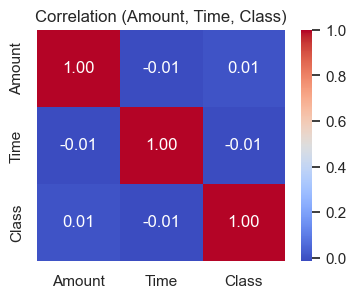

,Amount,Time,Class
Amount,1.000000,-0.010596,0.005632
Time,-0.010596,1.000000,-0.012323
Class,0.005632,-0.012323,1.000000


In [10]:
corr = df[['Amount', 'Time', 'Class']].corr()
plt.figure(figsize=(4,3))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation (Amount, Time, Class)")
plt.show()

corr

### Quick correlation overview

- Neither `Amount` nor `Time` shows a strong linear correlation with `Class`; their correlation values with `Class` are very close to 0.
- This suggests that, by themselves, `Amount` and `Time` are not sufficient to separate fraud from non-fraud using a simple linear rule.
- My early guess is that `Amount` could still be useful in combination with other transformed features, while `Time` may be less important and might even be dropped later if it does not help the model.

### Day 3 Summary

- The dataset is extremely imbalanced: almost all transactions are non-fraud, and only a tiny fraction are labeled as fraud.
- Transaction Amount is highly skewed, with many small transactions and a few very large ones; fraud and non-fraud overlap in Amount but show some differences in their spread.
- Time is spread over the two-day window and does not show a clear separation between fraud and non-fraud or strong linear correlation with the target.
- Correlations between Amount/Time and Class are very weak, so these features probably need to be combined with the other V-features to be useful.
- For modeling, I plan to scale Amount and other numeric features and to explicitly handle the class imbalance using resampling or class weights and metrics that focus on the minority class.

## Feature Analysis: V columns vs Class

In [18]:
# Features to analyze (these often show patterns in fraud)

v_features = ['V1', 'V2', 'V3', 'V4', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']

In [19]:
# Add the histogram loop (in a new code cell under v_features)

import matplotlib.pyplot as plt
import seaborn as sns

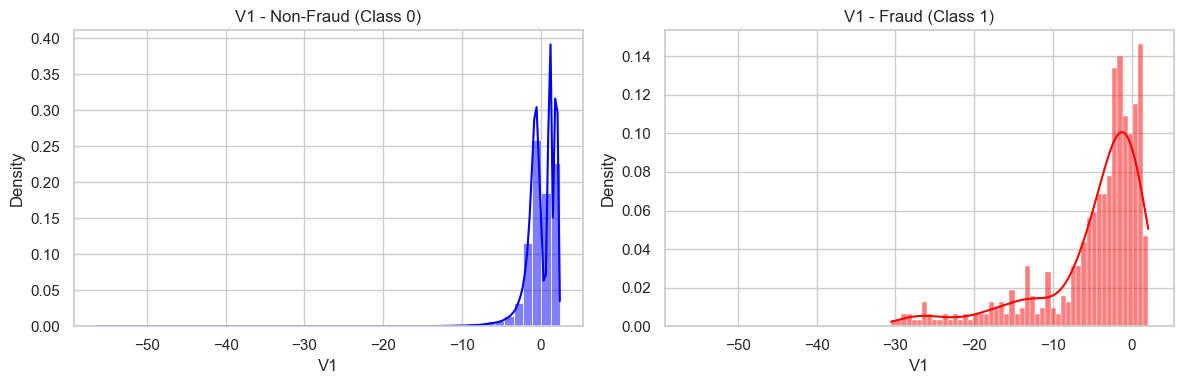

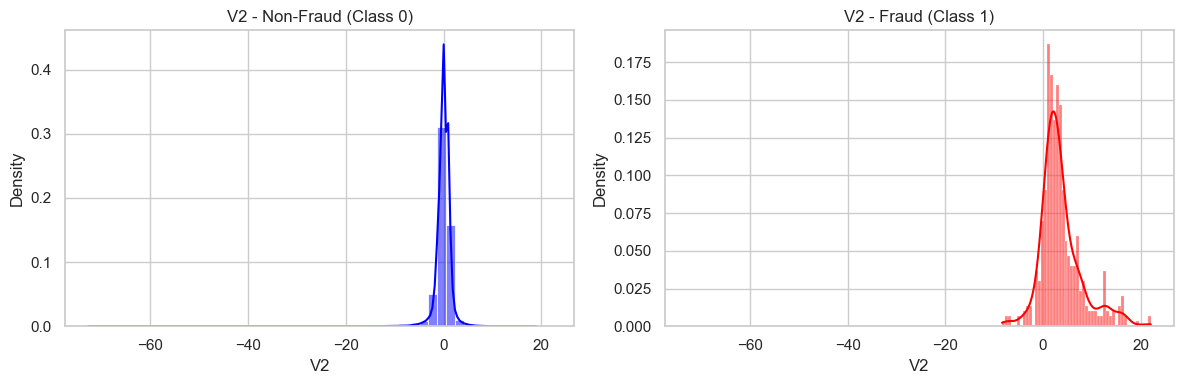

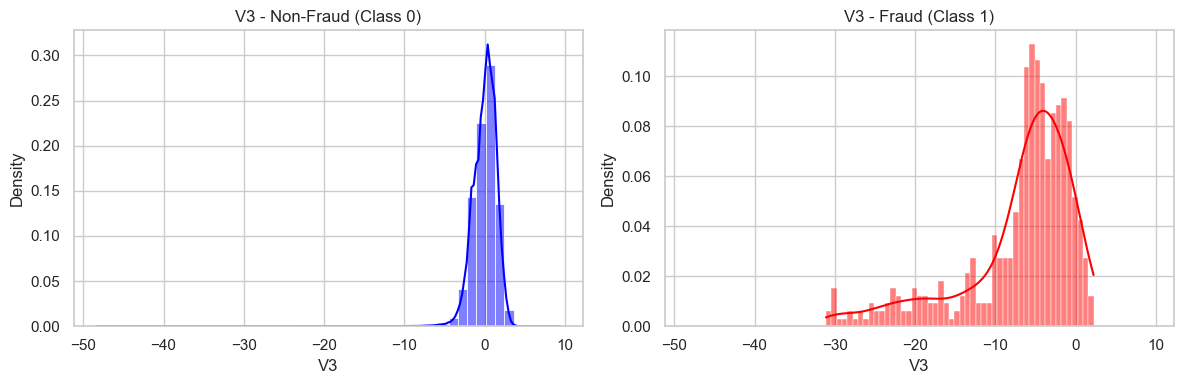

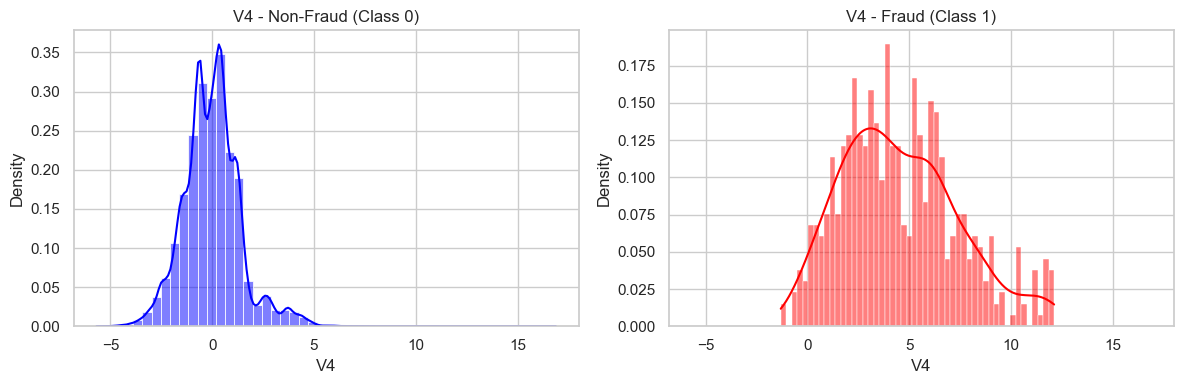

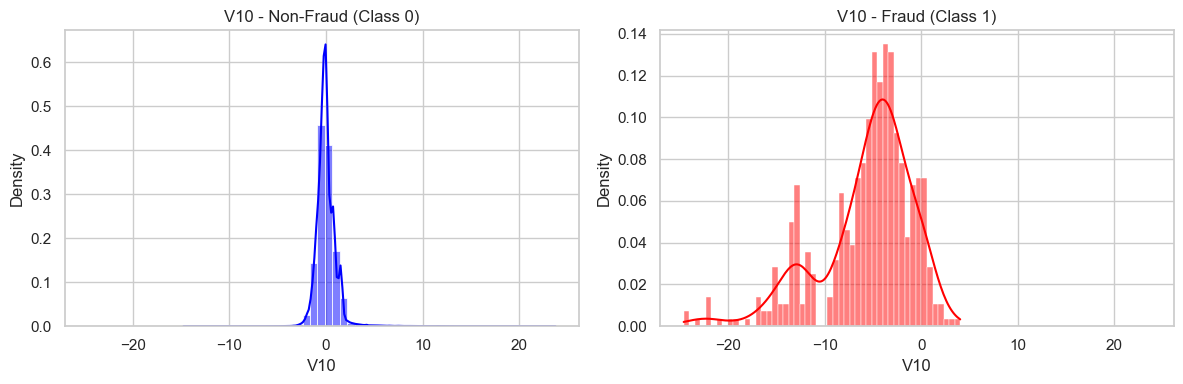

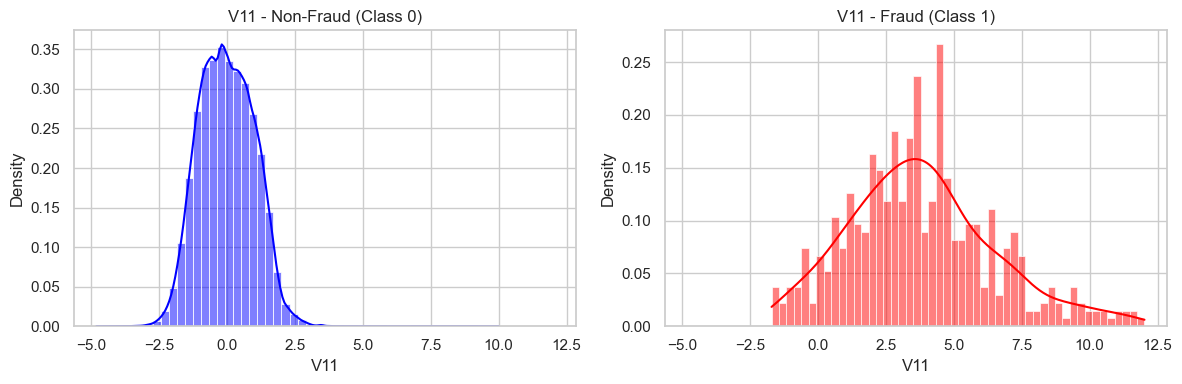

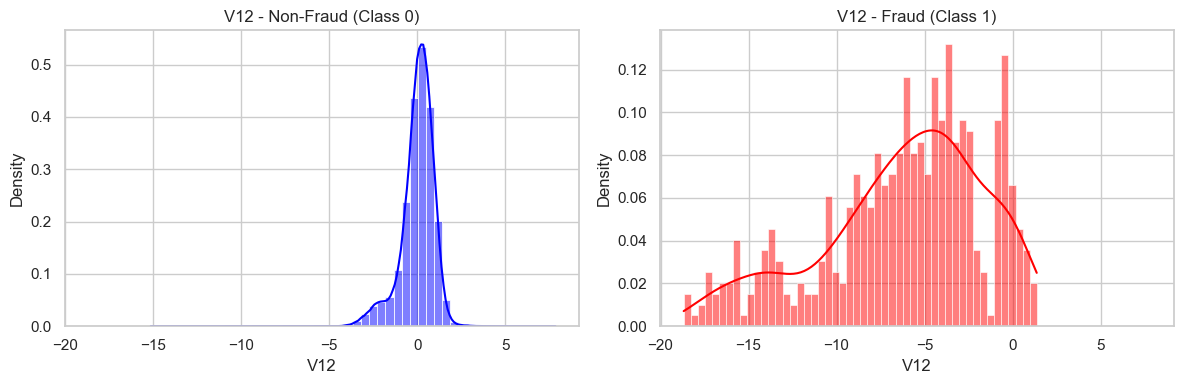

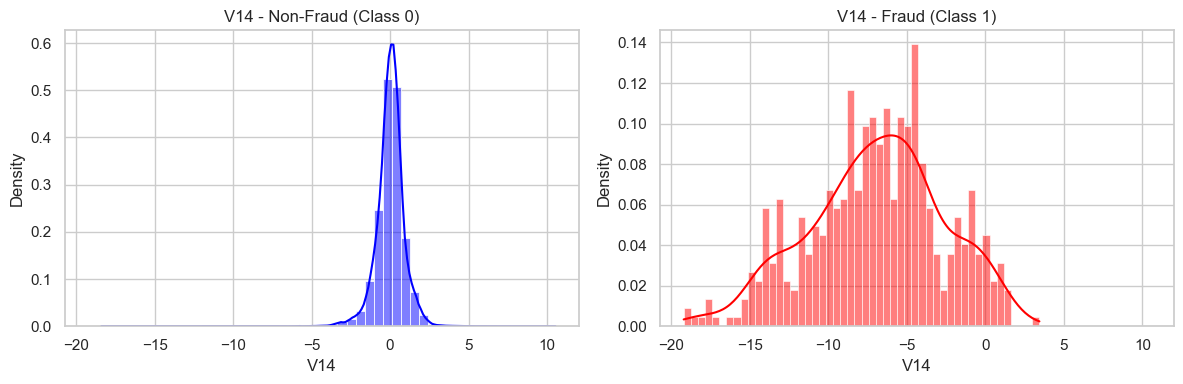

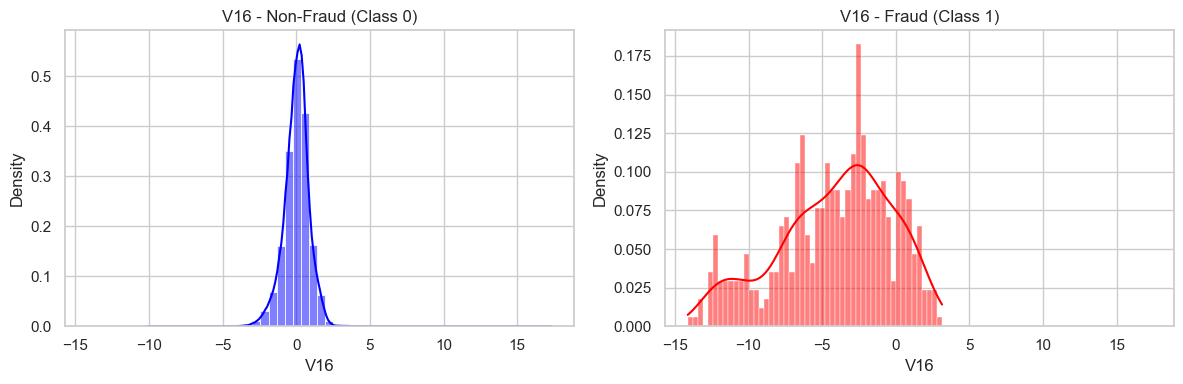

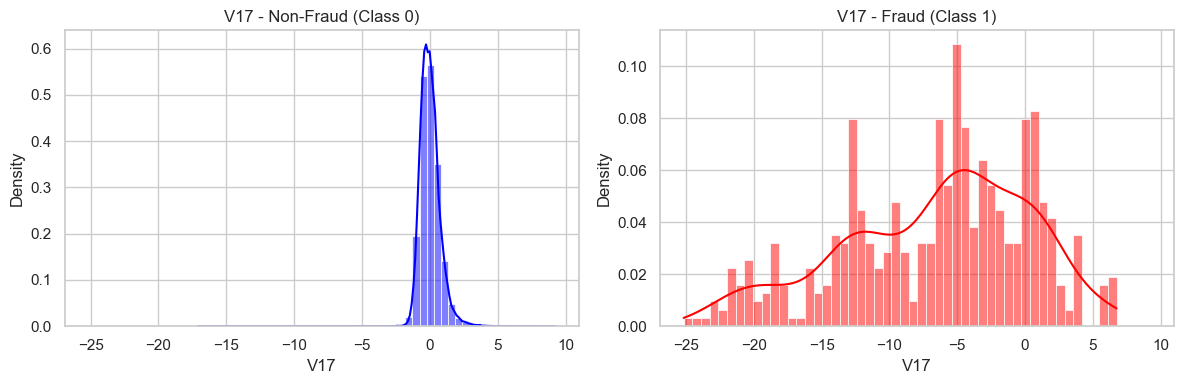

In [20]:
# Loop through selected V features
for col in v_features:
    fig, axes = plt.subplots(1, 2, figsize=(12,4), sharex = True)

    # Class 0 (non-fraud)
    sns.histplot(
        df[df['Class'] == 0][col],
        bins = 50,
        ax = axes[0],
        stat = 'density',
        color = 'blue',
        kde = True
    )
    axes[0].set_title(f'{col} - Non-Fraud (Class 0)')
    axes[0].set_ylabel('Density')

    # Class 1 (fraud)
    sns.histplot(
        df[df['Class'] == 1][col],
        bins = 50,
        ax = axes[1],
        stat = 'density',
        color = 'red',
        kde = True
    )
    axes[1].set_title(f'{col} - Fraud (Class 1)')

    plt.tight_layout()
    plt.show()

### Key observations from V features:

- **V14**: Fraud transactions are more concentrated at negative values (clear separation).
- **V12**: Fraud shows a different distribution shape and range.
- **V17**: Strong separation between fraud and non-fraud.
- **V10**: Distributions are more similar, may be less useful.
- **V4**: Fraud has a wider spread than non-fraud.

Most promising features: V14, V12, V17 (and any others you notice).

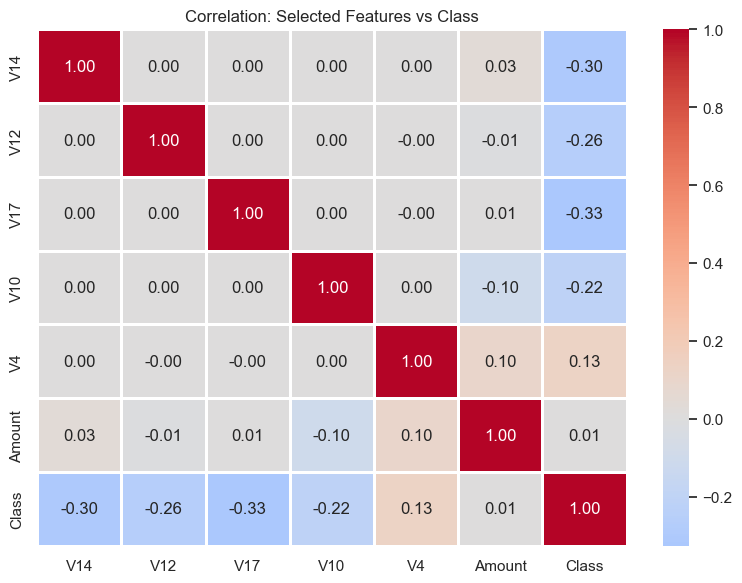

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# select top features that showed separation + target
selected_features = ['V14', 'V12', 'V17', 'V10', 'V4', 'Amount', 'Class']

corr_matrix = df[selected_features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot = True,
    cmap = 'coolwarm',
    center = 0,
    fmt = '.2f',
    linewidths = 1
)
plt.title('Correlation: Selected Features vs Class')
plt.tight_layout()
plt.show()

### Correlation insights

- **V14** shows a moderate negative correlation with Class, confirming it is a strong predictor.
- **V12** and **V17** also show noticeable correlation with Class.
- **V10** and **V4** have weaker but still non-zero correlation.
- **Amount** has very weak correlation with Class, matching our earlier finding from Day 3.